In [6]:
!pip install pandas matplotlib seaborn plotly streamlit


  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached plotly-6.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached streamlit-1.52.2-py3-none-any.whl.metadata (9.8 kB)
  Using cached numpy-2.4.0-cp313-cp313-win_amd64.whl.metadata (6.6 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached narwhals-


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv("../data/football_matches_2024_2025.csv")
df.head(), df.shape


(  competition_code competition_name     season  match_id  matchday  \
 0               PL   Premier League  2024/2025    497410         1   
 1               PL   Premier League  2024/2025    497411         1   
 2               PL   Premier League  2024/2025    497412         1   
 3               PL   Premier League  2024/2025    497413         1   
 4               PL   Premier League  2024/2025    497414         1   
 
             stage    status                   date_utc         referee  \
 0  REGULAR_SEASON  FINISHED  2024-08-16 19:00:00+00:00    Robert Jones   
 1  REGULAR_SEASON  FINISHED  2024-08-17 11:30:00+00:00    Tim Robinson   
 2  REGULAR_SEASON  FINISHED  2024-08-17 14:00:00+00:00  Jarred Gillett   
 3  REGULAR_SEASON  FINISHED  2024-08-17 14:00:00+00:00    Simon Hooper   
 4  REGULAR_SEASON  FINISHED  2024-08-17 14:00:00+00:00    Craig Pawson   
 
    home_team_id  ... fulltime_home  fulltime_away halftime_home  \
 0            66  ...             1              0  

In [10]:
# create total goals if not already
if "total_goals" not in df.columns:
    df["total_goals"] = df["home_goals"] + df["away_goals"]

# ensure match_outcome exists
df["match_outcome"] = df["match_outcome"].astype("category")


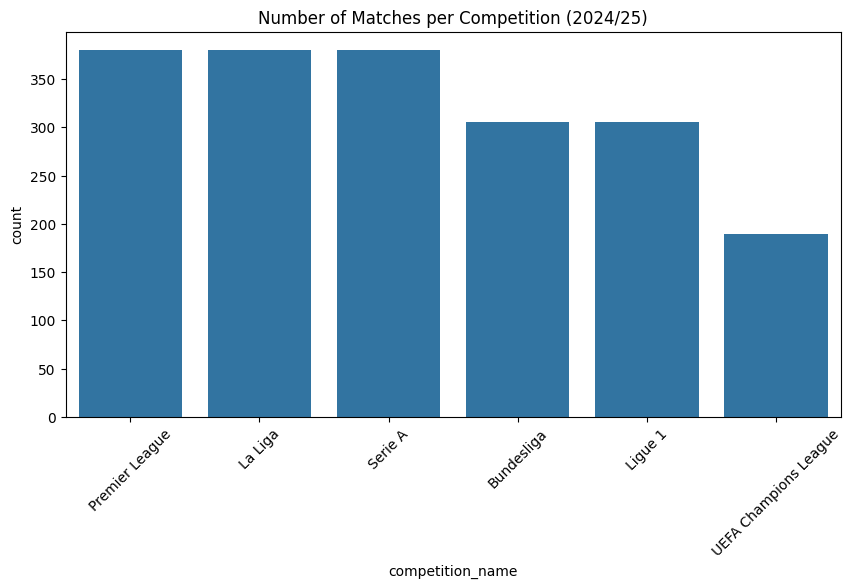

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="competition_name")
plt.xticks(rotation=45)
plt.title("Number of Matches per Competition (2024/25)")
plt.show()


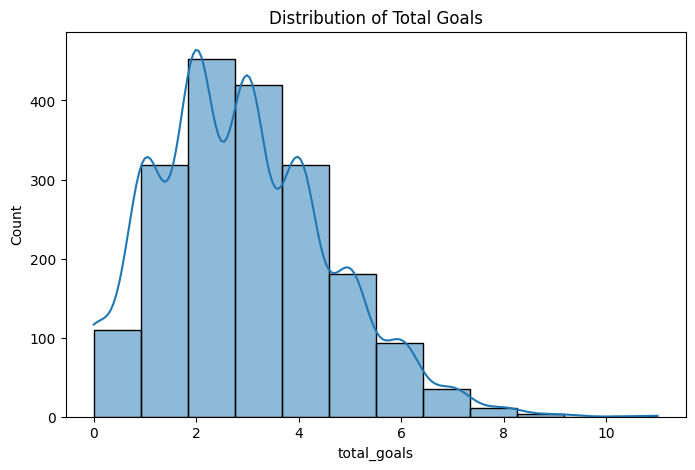

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df["total_goals"], bins=12, kde=True)
plt.title("Distribution of Total Goals")
plt.show()


In [14]:
df.columns


Index(['competition_code', 'competition_name', 'season', 'match_id',
       'matchday', 'stage', 'status', 'date_utc', 'referee', 'home_team_id',
       'home_team', 'away_team_id', 'away_team', 'fulltime_home',
       'fulltime_away', 'halftime_home', 'halftime_away', 'goal_difference',
       'total_goals', 'match_outcome', 'home_points', 'away_points',
       'referee_id'],
      dtype='object')

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


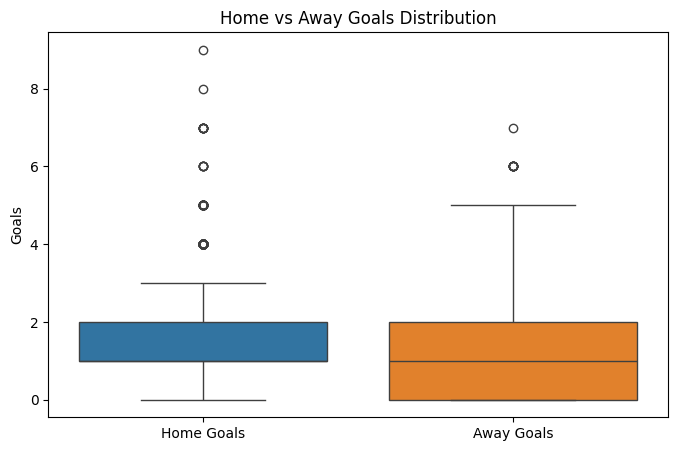

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[["fulltime_home", "fulltime_away"]])
plt.xticks([0, 1], ["Home Goals", "Away Goals"])
plt.title("Home vs Away Goals Distribution")
plt.ylabel("Goals")
plt.show()


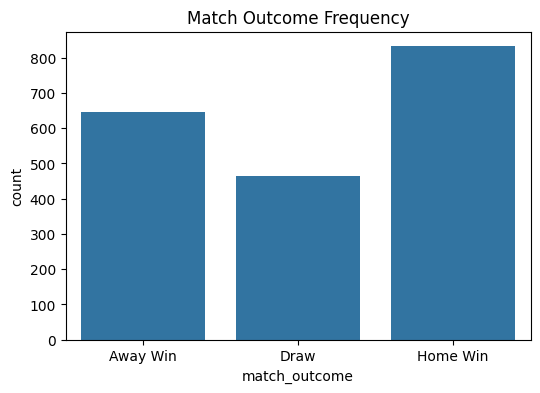

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="match_outcome")
plt.title("Match Outcome Frequency")
plt.show()


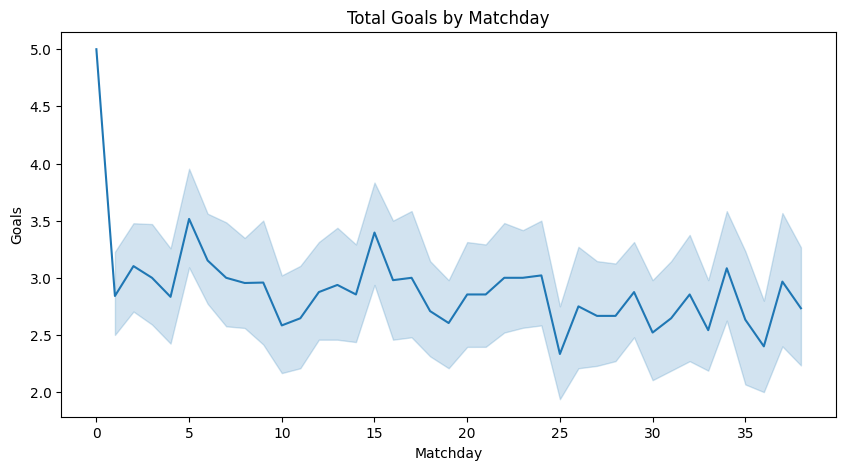

In [18]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="matchday", y="total_goals")
plt.title("Total Goals by Matchday")
plt.xlabel("Matchday")
plt.ylabel("Goals")
plt.show()


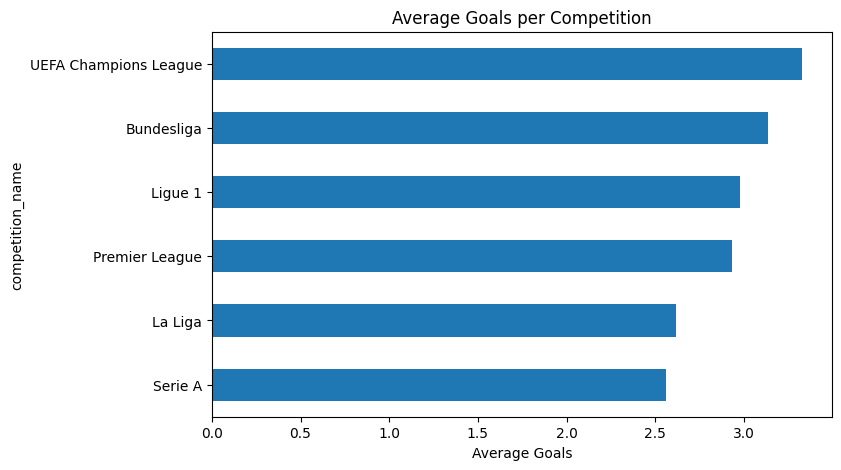

In [19]:
avg_goals = df.groupby("competition_name")["total_goals"].mean()

avg_goals.sort_values().plot(kind="barh", figsize=(8,5))
plt.title("Average Goals per Competition")
plt.xlabel("Average Goals")
plt.show()


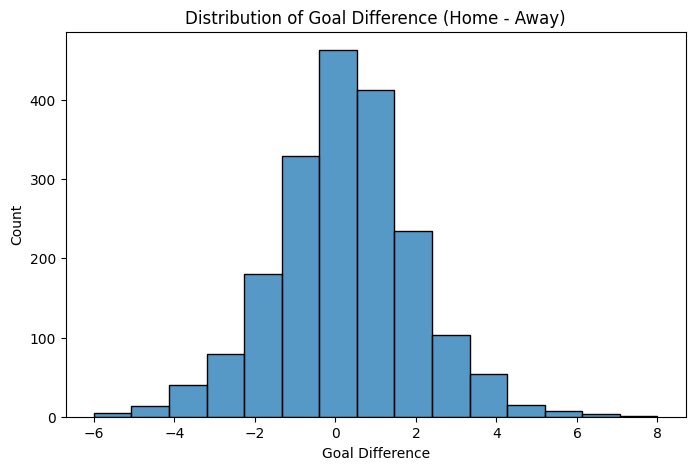

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df["goal_difference"], bins=15)
plt.title("Distribution of Goal Difference (Home - Away)")
plt.xlabel("Goal Difference")
plt.show()


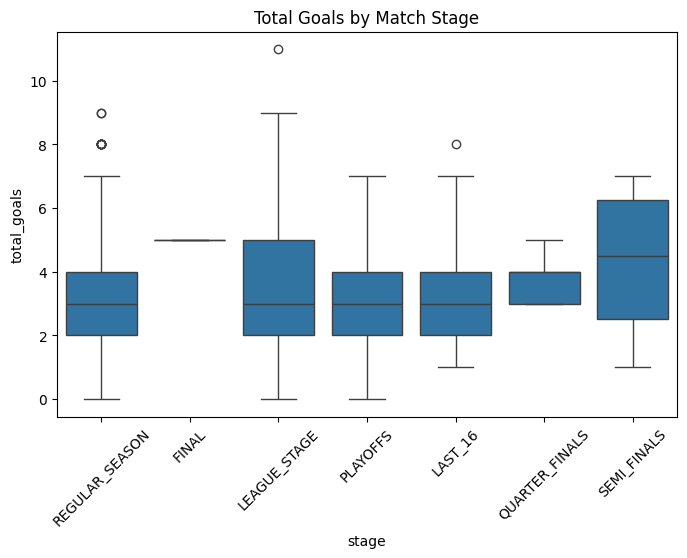

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="stage", y="total_goals")
plt.title("Total Goals by Match Stage")
plt.xticks(rotation=45)
plt.show()


In [22]:
df.sort_values("total_goals", ascending=False).head(10)[
    ["date_utc", "competition_name", "home_team", "away_team", "total_goals"]
]


,date_utc,competition_name,home_team,away_team,total_goals
1755,2024-09-17 19:00:00+00:00,UEFA Champions League,FC Bayern München,GNK Dinamo Zagreb,11
169,2024-12-22 16:30:00+00:00,Premier League,Tottenham Hotspur FC,Liverpool FC,9
1214,2024-11-02 14:30:00+00:00,Bundesliga,Eintracht Frankfurt,VfL Bochum 1848,9
1909,2025-01-21 20:00:00+00:00,UEFA Champions League,Sport Lisboa e Benfica,FC Barcelona,9
1781,2025-03-04 20:00:00+00:00,UEFA Champions League,PSV,Arsenal FC,8
18,2024-08-25 13:00:00+00:00,Premier League,Wolverhampton Wanderers FC,Chelsea FC,8
1406,2025-04-19 16:30:00+00:00,Bundesliga,1. FC Union Berlin,VfB Stuttgart,8
588,2025-01-26 20:00:00+00:00,La Liga,FC Barcelona,Valencia CF,8
1422,2025-05-03 13:30:00+00:00,Bundesliga,Borussia Mönchengladbach,TSG 1899 Hoffenheim,8
847,2024-10-27 17:00:00+00:00,Serie A,FC Internazionale Milano,Juventus FC,8


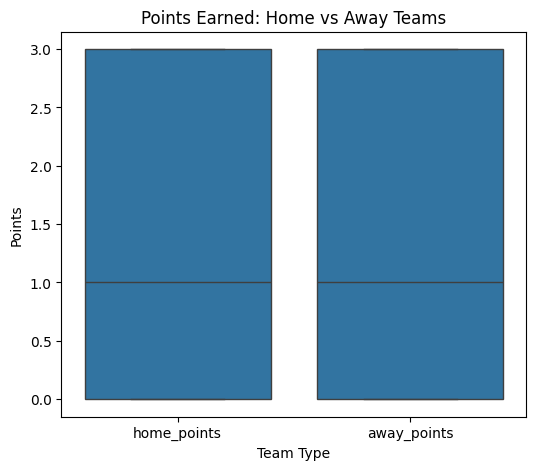

In [23]:
points = df[["home_points", "away_points"]].melt(
    var_name="Team Type", value_name="Points"
)

plt.figure(figsize=(6,5))
sns.boxplot(data=points, x="Team Type", y="Points")
plt.title("Points Earned: Home vs Away Teams")
plt.show()
